# Binary Classification Modeling Notebook
In this notebook I will be running binary classification models on our review text as our feature and the column 'is_positive' as our target. I will start out by running gridsearch and pipeline on Logisitc regression, Random Forest and Linear SVC models. After that I will do manual models for the top 2 performers, generating classification metrics, confusion matrices and finally feature importances for negative and postive words in each model.

In [80]:
import pandas as pd
import time
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cross_validation import KFold
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
import itertools
from sklearn.neural_network import MLPClassifier
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches
import pickle

In [82]:
df = pd.read_csv('./restaurants_review_final.csv', 
                 compression= 'gzip')
df_subset = df.sample(n=10000)

In [5]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1661312 to 1050755
Data columns (total 10 columns):
stars          10000 non-null int64
useful         10000 non-null int64
text           10000 non-null object
funny          10000 non-null int64
cool           10000 non-null int64
business_id    10000 non-null object
name           10000 non-null object
state          10000 non-null object
text length    10000 non-null int64
is_positive    10000 non-null int64
dtypes: int64(6), object(4)
memory usage: 859.4+ KB


In [23]:
X = df_subset['text']
y = df_subset['is_positive']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state =42, 
                                                    stratify=y)

### Logistic Regression Pipeline/GridsearchCV

In [29]:
pipe_TFIDF = Pipeline([
    ('tf', TfidfVectorizer()),
    ('lr', LogisticRegression())
])

gs_params = {
    'tf__stop_words':  [None],
    'tf__ngram_range': [(1, 1)],
    'lr__penalty':['l2'],
    'lr__C': [1, 5, 10]
    
}

tf_gridsearch = GridSearchCV(pipe_TFIDF, gs_params, verbose=2)
tf_gridsearch = tf_gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] lr__C=1, lr__penalty=l2, tf__ngram_range=(1, 1), tf__stop_words=None 
[CV]  lr__C=1, lr__penalty=l2, tf__ngram_range=(1, 1), tf__stop_words=None, total=   0.6s
[CV] lr__C=1, lr__penalty=l2, tf__ngram_range=(1, 1), tf__stop_words=None 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  lr__C=1, lr__penalty=l2, tf__ngram_range=(1, 1), tf__stop_words=None, total=   0.6s
[CV] lr__C=1, lr__penalty=l2, tf__ngram_range=(1, 1), tf__stop_words=None 
[CV]  lr__C=1, lr__penalty=l2, tf__ngram_range=(1, 1), tf__stop_words=None, total=   0.6s
[CV] lr__C=5, lr__penalty=l2, tf__ngram_range=(1, 1), tf__stop_words=None 
[CV]  lr__C=5, lr__penalty=l2, tf__ngram_range=(1, 1), tf__stop_words=None, total=   0.6s
[CV] lr__C=5, lr__penalty=l2, tf__ngram_range=(1, 1), tf__stop_words=None 
[CV]  lr__C=5, lr__penalty=l2, tf__ngram_range=(1, 1), tf__stop_words=None, total=   0.6s
[CV] lr__C=5, lr__penalty=l2, tf__ngram_range=(1, 1), tf__stop_words=None 
[CV]  lr__C=5, lr__penalty=l2, tf__ngram_range=(1, 1), tf__stop_words=None, total=   0.6s
[CV] lr__C=10, lr__penalty=l2, tf__ngram_range=(1, 1), tf__stop_words=None 
[CV]  lr__C=10, lr__penalty=l2, tf__ngram_range=(1, 1), tf__stop_words=None, total=   0.6s
[CV] lr__C=10, lr__penalty=l2, tf__ngram_range=(1, 1), tf__stop_words=None 
[CV]  l

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    8.7s finished


In [30]:
print(tf_gridsearch.score(X_train, y_train))
print(tf_gridsearch.score(X_test, y_test))
print(tf_gridsearch.best_score_)
print(tf_gridsearch.best_params_)

0.9701333333333333
0.8796
0.8774666666666666
{'lr__C': 5, 'lr__penalty': 'l2', 'tf__ngram_range': (1, 1), 'tf__stop_words': None}


### Linear SVM model with Pipeline and GridsearchCV

In [38]:
pipe_svc = Pipeline([
    ('tf', TfidfVectorizer()),
    ('svm', LinearSVC())
])

gs_params = {
    'tf__stop_words': ['english', None],
    'tf__ngram_range': [(1, 1), (1,2), (2,2)],
    'svm__C': [1.0, 5.0, 10.0],
    'svm__penalty':['l2'],
    'svm__loss': ['hinge', 'squared_hinge']
    
}

svc_gridsearch = GridSearchCV(pipe_svc, gs_params, verbose=2)
svc_gridsearch = svc_gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] svm__C=1.0, svm__loss=hinge, svm__penalty=l2, tf__ngram_range=(1, 1), tf__stop_words=english 
[CV]  svm__C=1.0, svm__loss=hinge, svm__penalty=l2, tf__ngram_range=(1, 1), tf__stop_words=english, total=   0.5s
[CV] svm__C=1.0, svm__loss=hinge, svm__penalty=l2, tf__ngram_range=(1, 1), tf__stop_words=english 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  svm__C=1.0, svm__loss=hinge, svm__penalty=l2, tf__ngram_range=(1, 1), tf__stop_words=english, total=   0.5s
[CV] svm__C=1.0, svm__loss=hinge, svm__penalty=l2, tf__ngram_range=(1, 1), tf__stop_words=english 
[CV]  svm__C=1.0, svm__loss=hinge, svm__penalty=l2, tf__ngram_range=(1, 1), tf__stop_words=english, total=   0.5s
[CV] svm__C=1.0, svm__loss=hinge, svm__penalty=l2, tf__ngram_range=(1, 1), tf__stop_words=None 
[CV]  svm__C=1.0, svm__loss=hinge, svm__penalty=l2, tf__ngram_range=(1, 1), tf__stop_words=None, total=   0.6s
[CV] svm__C=1.0, svm__loss=hinge, svm__penalty=l2, tf__ngram_range=(1, 1), tf__stop_words=None 
[CV]  svm__C=1.0, svm__loss=hinge, svm__penalty=l2, tf__ngram_range=(1, 1), tf__stop_words=None, total=   0.6s
[CV] svm__C=1.0, svm__loss=hinge, svm__penalty=l2, tf__ngram_range=(1, 1), tf__stop_words=None 
[CV]  svm__C=1.0, svm__loss=hinge, svm__penalty=l2, tf__ngram_range=(1, 1), tf__stop_words=None, total=   0.6s
[CV] svm__C=1.0, svm__loss=hinge, svm__penalty=l2, t

[CV]  svm__C=5.0, svm__loss=hinge, svm__penalty=l2, tf__ngram_range=(1, 1), tf__stop_words=None, total=   0.6s
[CV] svm__C=5.0, svm__loss=hinge, svm__penalty=l2, tf__ngram_range=(1, 1), tf__stop_words=None 
[CV]  svm__C=5.0, svm__loss=hinge, svm__penalty=l2, tf__ngram_range=(1, 1), tf__stop_words=None, total=   0.6s
[CV] svm__C=5.0, svm__loss=hinge, svm__penalty=l2, tf__ngram_range=(1, 1), tf__stop_words=None 
[CV]  svm__C=5.0, svm__loss=hinge, svm__penalty=l2, tf__ngram_range=(1, 1), tf__stop_words=None, total=   0.6s
[CV] svm__C=5.0, svm__loss=hinge, svm__penalty=l2, tf__ngram_range=(1, 2), tf__stop_words=english 
[CV]  svm__C=5.0, svm__loss=hinge, svm__penalty=l2, tf__ngram_range=(1, 2), tf__stop_words=english, total=   1.5s
[CV] svm__C=5.0, svm__loss=hinge, svm__penalty=l2, tf__ngram_range=(1, 2), tf__stop_words=english 
[CV]  svm__C=5.0, svm__loss=hinge, svm__penalty=l2, tf__ngram_range=(1, 2), tf__stop_words=english, total=   1.6s
[CV] svm__C=5.0, svm__loss=hinge, svm__penalty=l2

[CV]  svm__C=10.0, svm__loss=hinge, svm__penalty=l2, tf__ngram_range=(1, 1), tf__stop_words=None, total=   0.7s
[CV] svm__C=10.0, svm__loss=hinge, svm__penalty=l2, tf__ngram_range=(1, 2), tf__stop_words=english 
[CV]  svm__C=10.0, svm__loss=hinge, svm__penalty=l2, tf__ngram_range=(1, 2), tf__stop_words=english, total=   1.3s
[CV] svm__C=10.0, svm__loss=hinge, svm__penalty=l2, tf__ngram_range=(1, 2), tf__stop_words=english 
[CV]  svm__C=10.0, svm__loss=hinge, svm__penalty=l2, tf__ngram_range=(1, 2), tf__stop_words=english, total=   1.7s
[CV] svm__C=10.0, svm__loss=hinge, svm__penalty=l2, tf__ngram_range=(1, 2), tf__stop_words=english 
[CV]  svm__C=10.0, svm__loss=hinge, svm__penalty=l2, tf__ngram_range=(1, 2), tf__stop_words=english, total=   1.6s
[CV] svm__C=10.0, svm__loss=hinge, svm__penalty=l2, tf__ngram_range=(1, 2), tf__stop_words=None 
[CV]  svm__C=10.0, svm__loss=hinge, svm__penalty=l2, tf__ngram_range=(1, 2), tf__stop_words=None, total=   2.1s
[CV] svm__C=10.0, svm__loss=hinge,

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:  3.3min finished


In [39]:
print(svc_gridsearch.score(X_train, y_train))
print(svc_gridsearch.score(X_test, y_test))
print(svc_gridsearch.best_score_)
print(svc_gridsearch.best_params_)

0.9998666666666667
0.8848
0.8893333333333333
{'svm__C': 10.0, 'svm__loss': 'squared_hinge', 'svm__penalty': 'l2', 'tf__ngram_range': (1, 2), 'tf__stop_words': None}


### Random Forest with Pipeline/GridsearchCV

In [40]:
pipe_rf = Pipeline([
    ('tf', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

gs_params = {
    'tf__stop_words': ['english', None],
    'tf__ngram_range': [(1, 1), (1,2), (2,2)],
    'rf__criterion': ['gini', 'entropy'],
    'rf__max_depth': [None, 1, 2, 3, 4, 5, 6 , 7, 8, 9, 10]
}

rf_gridsearch = GridSearchCV(pipe_rf, gs_params, verbose=2)
rf_gridsearch = rf_gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 132 candidates, totalling 396 fits
[CV] rf__criterion=gini, rf__max_depth=None, tf__ngram_range=(1, 1), tf__stop_words=english 
[CV]  rf__criterion=gini, rf__max_depth=None, tf__ngram_range=(1, 1), tf__stop_words=english, total=   0.9s
[CV] rf__criterion=gini, rf__max_depth=None, tf__ngram_range=(1, 1), tf__stop_words=english 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  rf__criterion=gini, rf__max_depth=None, tf__ngram_range=(1, 1), tf__stop_words=english, total=   0.8s
[CV] rf__criterion=gini, rf__max_depth=None, tf__ngram_range=(1, 1), tf__stop_words=english 
[CV]  rf__criterion=gini, rf__max_depth=None, tf__ngram_range=(1, 1), tf__stop_words=english, total=   0.8s
[CV] rf__criterion=gini, rf__max_depth=None, tf__ngram_range=(1, 1), tf__stop_words=None 
[CV]  rf__criterion=gini, rf__max_depth=None, tf__ngram_range=(1, 1), tf__stop_words=None, total=   0.9s
[CV] rf__criterion=gini, rf__max_depth=None, tf__ngram_range=(1, 1), tf__stop_words=None 
[CV]  rf__criterion=gini, rf__max_depth=None, tf__ngram_range=(1, 1), tf__stop_words=None, total=   1.0s
[CV] rf__criterion=gini, rf__max_depth=None, tf__ngram_range=(1, 1), tf__stop_words=None 
[CV]  rf__criterion=gini, rf__max_depth=None, tf__ngram_range=(1, 1), tf__stop_words=None, total=   1.0s
[CV] rf__criterion=gini, rf__max_depth=None, tf__ngram_range=(1, 2), tf__stop_words=english 
[CV]  rf__cri

[CV]  rf__criterion=gini, rf__max_depth=2, tf__ngram_range=(1, 2), tf__stop_words=english, total=   1.4s
[CV] rf__criterion=gini, rf__max_depth=2, tf__ngram_range=(1, 2), tf__stop_words=None 
[CV]  rf__criterion=gini, rf__max_depth=2, tf__ngram_range=(1, 2), tf__stop_words=None, total=   2.5s
[CV] rf__criterion=gini, rf__max_depth=2, tf__ngram_range=(1, 2), tf__stop_words=None 
[CV]  rf__criterion=gini, rf__max_depth=2, tf__ngram_range=(1, 2), tf__stop_words=None, total=   1.8s
[CV] rf__criterion=gini, rf__max_depth=2, tf__ngram_range=(1, 2), tf__stop_words=None 
[CV]  rf__criterion=gini, rf__max_depth=2, tf__ngram_range=(1, 2), tf__stop_words=None, total=   2.1s
[CV] rf__criterion=gini, rf__max_depth=2, tf__ngram_range=(2, 2), tf__stop_words=english 
[CV]  rf__criterion=gini, rf__max_depth=2, tf__ngram_range=(2, 2), tf__stop_words=english, total=   1.1s
[CV] rf__criterion=gini, rf__max_depth=2, tf__ngram_range=(2, 2), tf__stop_words=english 
[CV]  rf__criterion=gini, rf__max_depth=2, 

[CV]  rf__criterion=gini, rf__max_depth=4, tf__ngram_range=(2, 2), tf__stop_words=None, total=   1.6s
[CV] rf__criterion=gini, rf__max_depth=4, tf__ngram_range=(2, 2), tf__stop_words=None 
[CV]  rf__criterion=gini, rf__max_depth=4, tf__ngram_range=(2, 2), tf__stop_words=None, total=   1.7s
[CV] rf__criterion=gini, rf__max_depth=4, tf__ngram_range=(2, 2), tf__stop_words=None 
[CV]  rf__criterion=gini, rf__max_depth=4, tf__ngram_range=(2, 2), tf__stop_words=None, total=   1.9s
[CV] rf__criterion=gini, rf__max_depth=5, tf__ngram_range=(1, 1), tf__stop_words=english 
[CV]  rf__criterion=gini, rf__max_depth=5, tf__ngram_range=(1, 1), tf__stop_words=english, total=   0.6s
[CV] rf__criterion=gini, rf__max_depth=5, tf__ngram_range=(1, 1), tf__stop_words=english 
[CV]  rf__criterion=gini, rf__max_depth=5, tf__ngram_range=(1, 1), tf__stop_words=english, total=   0.5s
[CV] rf__criterion=gini, rf__max_depth=5, tf__ngram_range=(1, 1), tf__stop_words=english 
[CV]  rf__criterion=gini, rf__max_depth=

[CV]  rf__criterion=gini, rf__max_depth=7, tf__ngram_range=(1, 1), tf__stop_words=None, total=   0.6s
[CV] rf__criterion=gini, rf__max_depth=7, tf__ngram_range=(1, 1), tf__stop_words=None 
[CV]  rf__criterion=gini, rf__max_depth=7, tf__ngram_range=(1, 1), tf__stop_words=None, total=   0.6s
[CV] rf__criterion=gini, rf__max_depth=7, tf__ngram_range=(1, 2), tf__stop_words=english 
[CV]  rf__criterion=gini, rf__max_depth=7, tf__ngram_range=(1, 2), tf__stop_words=english, total=   1.5s
[CV] rf__criterion=gini, rf__max_depth=7, tf__ngram_range=(1, 2), tf__stop_words=english 
[CV]  rf__criterion=gini, rf__max_depth=7, tf__ngram_range=(1, 2), tf__stop_words=english, total=   1.6s
[CV] rf__criterion=gini, rf__max_depth=7, tf__ngram_range=(1, 2), tf__stop_words=english 
[CV]  rf__criterion=gini, rf__max_depth=7, tf__ngram_range=(1, 2), tf__stop_words=english, total=   1.4s
[CV] rf__criterion=gini, rf__max_depth=7, tf__ngram_range=(1, 2), tf__stop_words=None 
[CV]  rf__criterion=gini, rf__max_dep

[CV]  rf__criterion=gini, rf__max_depth=9, tf__ngram_range=(1, 2), tf__stop_words=None, total=   2.1s
[CV] rf__criterion=gini, rf__max_depth=9, tf__ngram_range=(2, 2), tf__stop_words=english 
[CV]  rf__criterion=gini, rf__max_depth=9, tf__ngram_range=(2, 2), tf__stop_words=english, total=   1.3s
[CV] rf__criterion=gini, rf__max_depth=9, tf__ngram_range=(2, 2), tf__stop_words=english 
[CV]  rf__criterion=gini, rf__max_depth=9, tf__ngram_range=(2, 2), tf__stop_words=english, total=   1.1s
[CV] rf__criterion=gini, rf__max_depth=9, tf__ngram_range=(2, 2), tf__stop_words=english 
[CV]  rf__criterion=gini, rf__max_depth=9, tf__ngram_range=(2, 2), tf__stop_words=english, total=   1.1s
[CV] rf__criterion=gini, rf__max_depth=9, tf__ngram_range=(2, 2), tf__stop_words=None 
[CV]  rf__criterion=gini, rf__max_depth=9, tf__ngram_range=(2, 2), tf__stop_words=None, total=   1.6s
[CV] rf__criterion=gini, rf__max_depth=9, tf__ngram_range=(2, 2), tf__stop_words=None 
[CV]  rf__criterion=gini, rf__max_dep

[CV]  rf__criterion=entropy, rf__max_depth=None, tf__ngram_range=(2, 2), tf__stop_words=None, total=   2.7s
[CV] rf__criterion=entropy, rf__max_depth=1, tf__ngram_range=(1, 1), tf__stop_words=english 
[CV]  rf__criterion=entropy, rf__max_depth=1, tf__ngram_range=(1, 1), tf__stop_words=english, total=   0.5s
[CV] rf__criterion=entropy, rf__max_depth=1, tf__ngram_range=(1, 1), tf__stop_words=english 
[CV]  rf__criterion=entropy, rf__max_depth=1, tf__ngram_range=(1, 1), tf__stop_words=english, total=   0.5s
[CV] rf__criterion=entropy, rf__max_depth=1, tf__ngram_range=(1, 1), tf__stop_words=english 
[CV]  rf__criterion=entropy, rf__max_depth=1, tf__ngram_range=(1, 1), tf__stop_words=english, total=   0.5s
[CV] rf__criterion=entropy, rf__max_depth=1, tf__ngram_range=(1, 1), tf__stop_words=None 
[CV]  rf__criterion=entropy, rf__max_depth=1, tf__ngram_range=(1, 1), tf__stop_words=None, total=   0.6s
[CV] rf__criterion=entropy, rf__max_depth=1, tf__ngram_range=(1, 1), tf__stop_words=None 
[CV]

[CV]  rf__criterion=entropy, rf__max_depth=3, tf__ngram_range=(1, 1), tf__stop_words=None, total=   0.6s
[CV] rf__criterion=entropy, rf__max_depth=3, tf__ngram_range=(1, 2), tf__stop_words=english 
[CV]  rf__criterion=entropy, rf__max_depth=3, tf__ngram_range=(1, 2), tf__stop_words=english, total=   1.4s
[CV] rf__criterion=entropy, rf__max_depth=3, tf__ngram_range=(1, 2), tf__stop_words=english 
[CV]  rf__criterion=entropy, rf__max_depth=3, tf__ngram_range=(1, 2), tf__stop_words=english, total=   1.5s
[CV] rf__criterion=entropy, rf__max_depth=3, tf__ngram_range=(1, 2), tf__stop_words=english 
[CV]  rf__criterion=entropy, rf__max_depth=3, tf__ngram_range=(1, 2), tf__stop_words=english, total=   1.5s
[CV] rf__criterion=entropy, rf__max_depth=3, tf__ngram_range=(1, 2), tf__stop_words=None 
[CV]  rf__criterion=entropy, rf__max_depth=3, tf__ngram_range=(1, 2), tf__stop_words=None, total=   1.9s
[CV] rf__criterion=entropy, rf__max_depth=3, tf__ngram_range=(1, 2), tf__stop_words=None 
[CV]  r

[CV]  rf__criterion=entropy, rf__max_depth=5, tf__ngram_range=(1, 2), tf__stop_words=None, total=   1.8s
[CV] rf__criterion=entropy, rf__max_depth=5, tf__ngram_range=(2, 2), tf__stop_words=english 
[CV]  rf__criterion=entropy, rf__max_depth=5, tf__ngram_range=(2, 2), tf__stop_words=english, total=   1.1s
[CV] rf__criterion=entropy, rf__max_depth=5, tf__ngram_range=(2, 2), tf__stop_words=english 
[CV]  rf__criterion=entropy, rf__max_depth=5, tf__ngram_range=(2, 2), tf__stop_words=english, total=   1.2s
[CV] rf__criterion=entropy, rf__max_depth=5, tf__ngram_range=(2, 2), tf__stop_words=english 
[CV]  rf__criterion=entropy, rf__max_depth=5, tf__ngram_range=(2, 2), tf__stop_words=english, total=   1.1s
[CV] rf__criterion=entropy, rf__max_depth=5, tf__ngram_range=(2, 2), tf__stop_words=None 
[CV]  rf__criterion=entropy, rf__max_depth=5, tf__ngram_range=(2, 2), tf__stop_words=None, total=   1.4s
[CV] rf__criterion=entropy, rf__max_depth=5, tf__ngram_range=(2, 2), tf__stop_words=None 
[CV]  r

[CV]  rf__criterion=entropy, rf__max_depth=7, tf__ngram_range=(2, 2), tf__stop_words=None, total=   1.5s
[CV] rf__criterion=entropy, rf__max_depth=8, tf__ngram_range=(1, 1), tf__stop_words=english 
[CV]  rf__criterion=entropy, rf__max_depth=8, tf__ngram_range=(1, 1), tf__stop_words=english, total=   0.5s
[CV] rf__criterion=entropy, rf__max_depth=8, tf__ngram_range=(1, 1), tf__stop_words=english 
[CV]  rf__criterion=entropy, rf__max_depth=8, tf__ngram_range=(1, 1), tf__stop_words=english, total=   0.5s
[CV] rf__criterion=entropy, rf__max_depth=8, tf__ngram_range=(1, 1), tf__stop_words=english 
[CV]  rf__criterion=entropy, rf__max_depth=8, tf__ngram_range=(1, 1), tf__stop_words=english, total=   0.5s
[CV] rf__criterion=entropy, rf__max_depth=8, tf__ngram_range=(1, 1), tf__stop_words=None 
[CV]  rf__criterion=entropy, rf__max_depth=8, tf__ngram_range=(1, 1), tf__stop_words=None, total=   0.6s
[CV] rf__criterion=entropy, rf__max_depth=8, tf__ngram_range=(1, 1), tf__stop_words=None 
[CV]  r

[CV]  rf__criterion=entropy, rf__max_depth=10, tf__ngram_range=(1, 1), tf__stop_words=None, total=   0.6s
[CV] rf__criterion=entropy, rf__max_depth=10, tf__ngram_range=(1, 2), tf__stop_words=english 
[CV]  rf__criterion=entropy, rf__max_depth=10, tf__ngram_range=(1, 2), tf__stop_words=english, total=   1.5s
[CV] rf__criterion=entropy, rf__max_depth=10, tf__ngram_range=(1, 2), tf__stop_words=english 
[CV]  rf__criterion=entropy, rf__max_depth=10, tf__ngram_range=(1, 2), tf__stop_words=english, total=   1.4s
[CV] rf__criterion=entropy, rf__max_depth=10, tf__ngram_range=(1, 2), tf__stop_words=english 
[CV]  rf__criterion=entropy, rf__max_depth=10, tf__ngram_range=(1, 2), tf__stop_words=english, total=   1.5s
[CV] rf__criterion=entropy, rf__max_depth=10, tf__ngram_range=(1, 2), tf__stop_words=None 
[CV]  rf__criterion=entropy, rf__max_depth=10, tf__ngram_range=(1, 2), tf__stop_words=None, total=   2.0s
[CV] rf__criterion=entropy, rf__max_depth=10, tf__ngram_range=(1, 2), tf__stop_words=Non

[Parallel(n_jobs=1)]: Done 396 out of 396 | elapsed: 12.3min finished


In [41]:
print(rf_gridsearch.score(X_train, y_train))
print(rf_gridsearch.score(X_test, y_test))
print(rf_gridsearch.best_score_)
print(rf_gridsearch.best_params_)

0.9950666666666667
0.8036
0.8021333333333334
{'rf__criterion': 'entropy', 'rf__max_depth': None, 'tf__ngram_range': (1, 1), 'tf__stop_words': 'english'}


### Manual Logistic Regression with metrics and feature importances

In [ ]:
X = df_subset["text"]
y = df_subset["is_positive"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
tf_vec = TfidfVectorizer()

X_train_td = tf_vec.fit_transform(X_train)
X_test_td = tf_vec.transform(X_test)

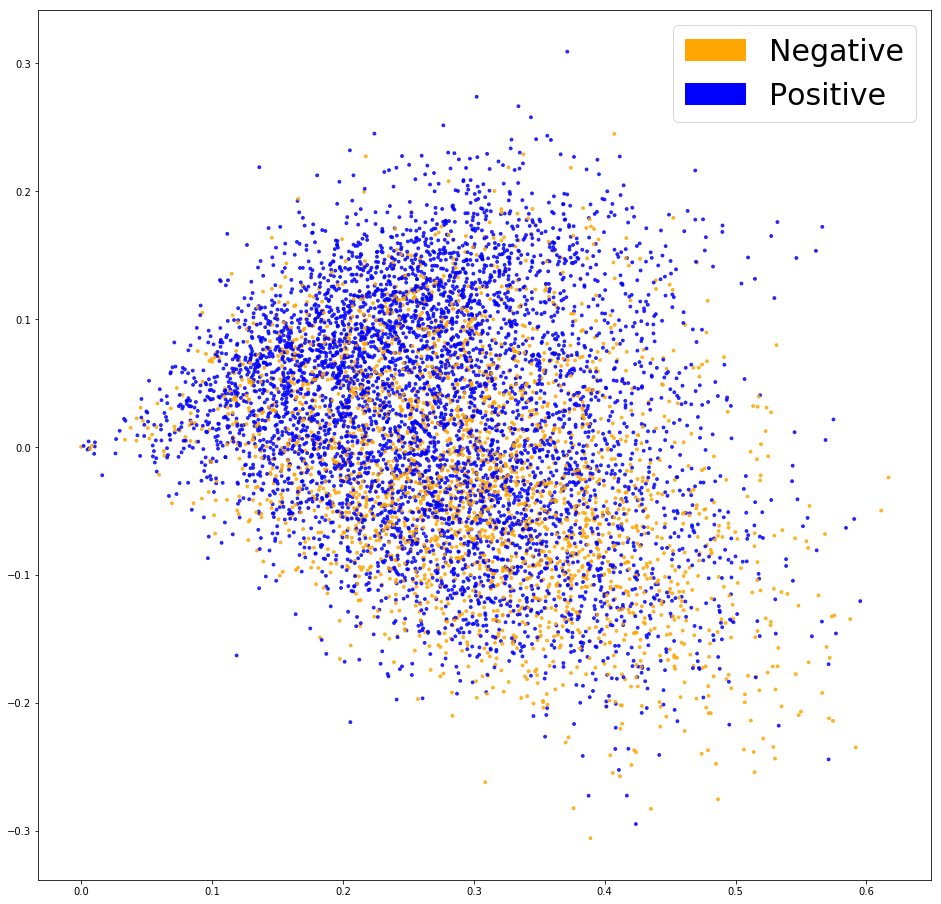

In [58]:
def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color='orange', label='Negative')
            green_patch = mpatches.Patch(color='blue', label='Positive')
            plt.legend(handles=[red_patch, green_patch], prop={'size': 30})


fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_td, y_train)
plt.show()

In [59]:
clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf.fit(X_train_td, y_train)

predictions = clf.predict(X_test_td)

print(clf.score(X_train_td, y_train))
print(clf.score(X_test_td, y_test))

0.9995
0.8645


In [75]:
with open('logisticreg_rests.pkl', 'wb') as model:
    pickle.dump(clf, model)

In [60]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, predictions)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.865, precision = 0.864, recall = 0.865, f1 = 0.864


In [62]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

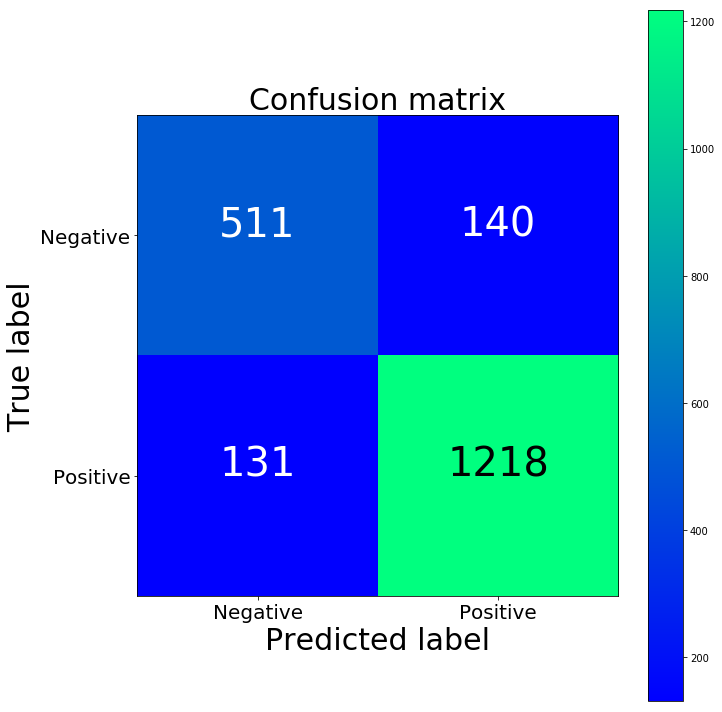

[[ 511  140]
 [ 131 1218]]


In [83]:
cm = confusion_matrix(y_test, predictions)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Negative','Positive'], normalize=False, title='Confusion matrix')
plt.savefig('./visuals/cm_logreg.png')
plt.show()
print(cm)

In [67]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

importance = get_most_important_features(tf_vec, clf, 10)

In [68]:
df_importance = pd.DataFrame(importance, columns = ['bottom', 'tops'])

In [87]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 10))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Negative', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Positive', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.savefig('./visuals/lsvc_feat.png')
    plt.show()

top_scores = [a[0] for a in importance[0]['tops']]
top_words = [a[1] for a in importance[0]['tops']]
bottom_scores = [a[0] for a in importance[0]['bottom']]
bottom_words = [a[1] for a in importance[0]['bottom']]

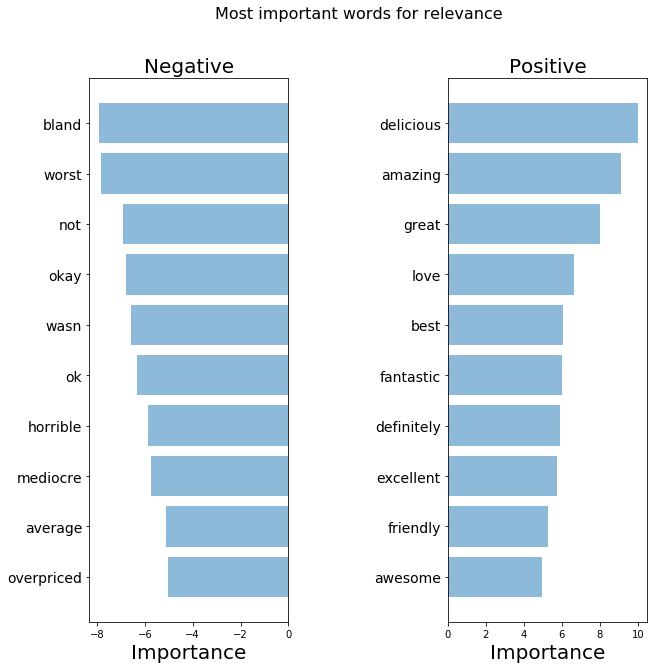

In [86]:
plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

### Manual Linear SVC with metrics and feature importances

In [70]:
svc = LinearSVC(C = 10.0, loss = 'squared_hinge', penalty = 'l2')
svc.fit(X_train_td, y_train)

predictions_svc = svc.predict(X_test_td)

print(svc.score(X_train_td, y_train))
print(svc.score(X_test_td, y_test))

0.999875
0.8525


In [77]:
X_train_td

<8000x22954 sparse matrix of type '<class 'numpy.float64'>'
	with 565012 stored elements in Compressed Sparse Row format>

In [76]:
with open('linear_svc_rests.pkl', 'wb') as model:
    pickle.dump(svc, model)

In [71]:
accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf = get_metrics(y_test, predictions_svc)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % 
      (accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf))

accuracy = 0.853, precision = 0.850, recall = 0.853, f1 = 0.851


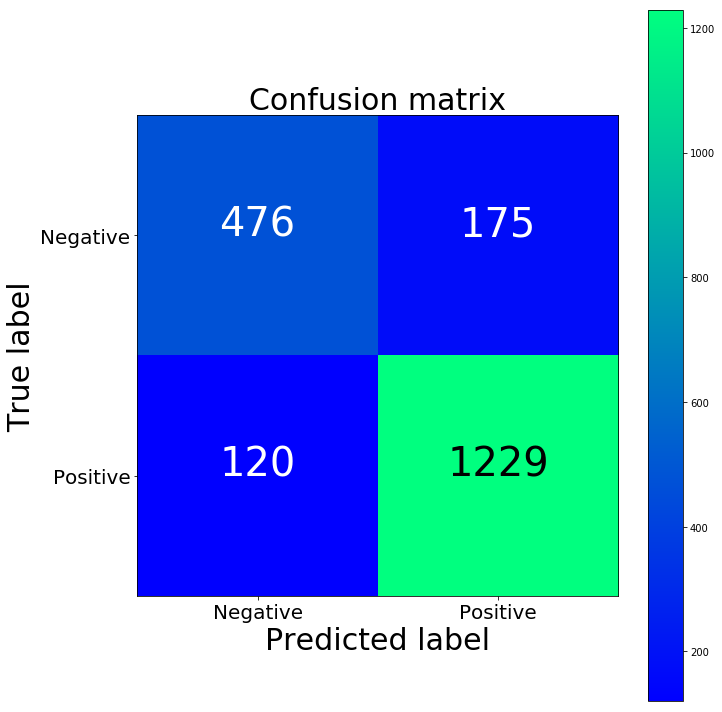

LinearSVC confusion matrix
[[ 476  175]
 [ 120 1229]]
Logistic Regression confusion matrix
[[ 511  140]
 [ 131 1218]]


In [85]:
cm2 = confusion_matrix(y_test, predictions_svc)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm2, classes=['Negative','Positive'], 
                             normalize=False, title='Confusion matrix')
plt.savefig('./visuals/cm_LSVC.png')
plt.show()
print("LinearSVC confusion matrix")
print(cm2)
print("Logistic Regression confusion matrix")
print(cm)

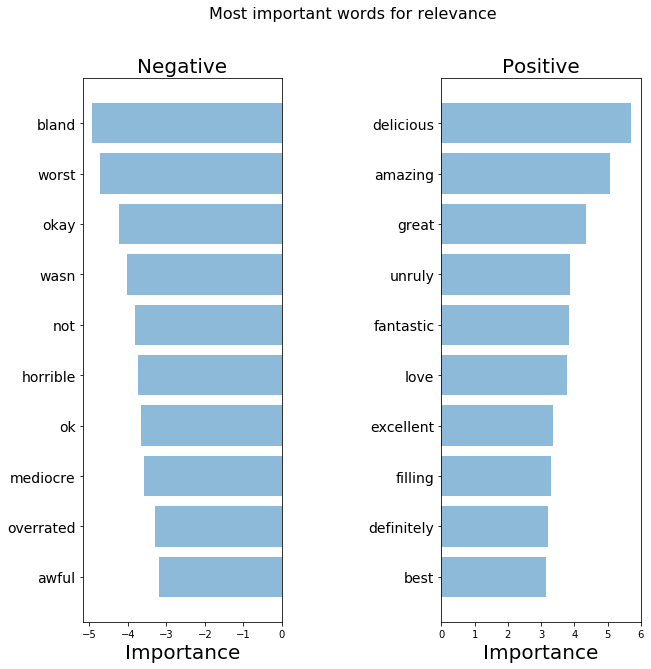

In [88]:
importance_tfidf = get_most_important_features(tf_vec, svc, 10)

top_scores = [a[0] for a in importance_tfidf[0]['tops']]
top_words = [a[1] for a in importance_tfidf[0]['tops']]
bottom_scores = [a[0] for a in importance_tfidf[0]['bottom']]
bottom_words = [a[1] for a in importance_tfidf[0]['bottom']]

plot_important_words(top_scores, top_words, 
                     bottom_scores, bottom_words, "Most important words for relevance")